# Narrative Analytics and Experimentation

### Comparing efficacy of three different compounds and a placebo in the treatment of symptoms of depression

XYZ Bio Laboratories (pseudonym) is American health care company that formulates and sells researched-based drugs based in Boston, Massachusetts. Currently, the company is experiencing revenue decline. After close examination, analysts at XYZ Bio Laboratories have discovered that the sales of its main product, ABC pill (pseudonym), an antidepressant, is no longer experiencing growth.

In hopes of increasing revenue and enhancing product development, the company is cultivating a new formula for the ABC pill. While in clinical research, scientists examined the safety and efficacy of there difference compounds (A, B, and C), and a placebo (D). A hundred patients were selected for this study based on specific baseline qualifications. Patients were randomly assigned to one of the four groups and neither the patients nor investigators had knowledge on which medication was assigned to who. Medication was given to each individual for the duration of the study.

The purpose of this report is to determine which compound is most effective in treating symptoms of depression. Then, a proposal of an A/B test plan will be crafted.


## Exploring the data

In this proposal, we will be examining a [clinical trial](https://gdallal.pages.tufts.edu/nut209/) report released by XYZ Bio Laboratories' research team. Below, we will explore the dataset by preforming decriptive analysis.

In [1]:
# Libraries 

import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
# Import data

data = pd.read_sas('clinical.sas7bdat')

In [3]:
# Convert selected features to categorical type

columns_category = ['MAR_STAT','TOBACCO','ALCOHOL',
             'TRT_EMOT','HOSPITAL','PSY_DIAG','CHANGED',
              'THER_EFF','ADV_EFF','TREATMEN']

data[columns_category] = data[columns_category].astype('int')
data[columns_category] = data[columns_category].astype('str')
data[columns_category] = data[columns_category].astype('category')

In [4]:
# Convert column values to text

cleanup_int = {'MAR_STAT': {'1':'single','2':'married',
                             '3':'separated or divorced','4':'widowed'},
              'TOBACCO': {'0':'none','1':'<1 pack daily','2':'1 pack daily',
                      '3':'>1 pack daily'},
              'ALCOHOL': {'0':'none','1':'social drinker (<1 drink weekly)',
                          '2':'social drinker (1 to 2 drinks weekly)',
                          '4':'3 or more drinks most days'},
              'TRT_EMOT': {'1':'psychiatrist','2':'non-psychiatrist physician',
                           '3':'both','4':'other'},
               'HOSPITAL': {'0':'no','1':'yes'},
               'PSY_DIAG': {'1':'major depressive disorder, single episode',
                           '2':'major depressive disorder, recurrent episodes',
                           '3':'bipolar affective disorder',
                           '4':'chronic depressive disorder',
                           '5':'atypical depressive disorder',
                           '6':'adjustment disorder with depressed mood'},
               'CHANGED': {'1':'very much improved',
                           '2':'much improved',
                           '3':'minimally improved',
                           '4':'no change',
                           '5':'minimally worse',
                           '6':'much worse',
                          '7':'very much worse'},
               'THER_EFF': {'1':'marked','2':'moderate','3':'minimal',
                            '4':'unchanged','5':'worse'},
              'ADV_EFF': {'1':'none','2':'does not significantly interfere with patient’s functioning',
                          '3':'significantly interferes with patient’s functioning',
                            '4':'nullifies therapeutic effect'},
              'TREATMEN':{'1':'A','2':'B','3':'C','4':'D',}}

data.replace(cleanup_int,inplace=True)

In [17]:
# Rename columns 

data.rename(columns={'PATIENT':'Patient Number',
                          'AGE':'Age',
                          'MAR_STAT':'Martial Status',
                         'COFF_TEA':'Coffee/Tea Consumption (cups/day)',
                         'TOBACCO':'Tobacco Consumption',
                         'ALCOHOL':'Alcohol Consumption',
                         'TRT_EMOT':'Previous Treatment for Emotional Problems',
                         'HOSPITAL':'Hospitalization for Emotional Problems',
                         'PSY_DIAG':'Psychiatrist Diagnosis',
                     'ANXIETY':'Anxiety Score (HAM-D)',
                     'RETARDTN':'Retardation Score (HAM-D)',
                     'SLEEP_HA':'Sleep Disturbance Score (HAM-D)',
                     'TOTAL_HA':'Total Score (HAM-D)',
                     'OBRIST':'Hopkins Obrist Cluster Total',
                     'APPETITE':'Appetite Distrubance Score',
                     'CHANGED':'Changed',
                         'THER_EFF':'Therapeutic Effect',
                         'ADV_EFF':'Adverse Effects',
                         'TREATMEN':'Treatment Group'}, 
                 inplace=True)

In [43]:
# Create dataframe for each Treatment Group 

A = data[data['Treatment Group']=='A']
B = data[data['Treatment Group']=='B']
C = data[data['Treatment Group']=='C']
D = data[data['Treatment Group']=='D']

25


In [44]:
# Sample of dataset

data.head()


,Patient Number,Age,Martial Status,Coffee/Tea Consumption (cups/day),Tobacco Consumption,Alcohol Consumption,Previous Treatment for Emotional Problems,Hospitalization for Emotional Problems,Psychiatrist Diagnosis,Anxiety Score (HAM-D),Retardation Score (HAM-D),Sleep Disturbance Score (HAM-D),Total Score (HAM-D),Hopkins Obrist Cluster Total,Appetite Distrubance Score,Changed,Therapeutic Effect,Adverse Effects,Treatment Group
0,1.0,23.0,married,3.0,<1 pack daily,none,0,no,"major depressive disorder, single episode",0.33,0.75,0.00,16.0,56.0,91.0,no change,unchanged,none,D
1,2.0,18.0,single,0.0,1 pack daily,none,psychiatrist,no,"major depressive disorder, recurrent episodes",0.33,1.25,0.33,12.0,57.0,42.5,minimally improved,minimal,none,A
2,3.0,36.0,married,2.0,1 pack daily,social drinker (1 to 2 drinks weekly),psychiatrist,no,"major depressive disorder, recurrent episodes",0.50,0.25,0.33,6.0,40.0,91.0,very much improved,marked,does not significantly interfere with patient’...,B
3,4.0,51.0,widowed,5.0,>1 pack daily,none,0,no,"major depressive disorder, single episode",0.17,0.75,0.67,6.0,39.0,61.0,much improved,marked,none,A
4,5.0,24.0,single,6.0,1 pack daily,social drinker (<1 drink weekly),psychiatrist,no,"major depressive disorder, recurrent episodes",1.00,1.00,1.00,13.0,49.0,1.5,minimally improved,minimal,none,B


There are 19 attributes in this dataset. The first nine columns contain information about the social, consumption, and medical history of patients. Then, the rest of the columns reflect the numerous scores of anxiety and depression scales measured at the end of the study. 

The scores were based on the __Hamilton Depression Rating (HAM-D) Scale__, which is used to determine a patient’s level of depression. An individual item is scored from 0 (not present) to 4 (serve). A sum of the scores between 0-7 is perceived as normal while anything higher than 23 is deemed as very severe depression.

In [60]:
# Data statistics 

data.describe(include='all')

,Patient Number,Age,Martial Status,Coffee/Tea Consumption (cups/day),Tobacco Consumption,Alcohol Consumption,Previous Treatment for Emotional Problems,Hospitalization for Emotional Problems,Psychiatrist Diagnosis,Anxiety Score (HAM-D),Retardation Score (HAM-D),Sleep Disturbance Score (HAM-D),Total Score (HAM-D),Hopkins Obrist Cluster Total,Appetite Distrubance Score,Changed,Therapeutic Effect,Adverse Effects,Treatment Group
count,100.000000,100.000000,100,100.000000,100,100,100,100,100,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100,100,100,100
unique,NaN,NaN,4,NaN,4,5,2,2,4,NaN,NaN,NaN,NaN,NaN,NaN,6,5,4,4
top,NaN,NaN,married,NaN,none,none,psychiatrist,no,"major depressive disorder, recurrent episodes",NaN,NaN,NaN,NaN,NaN,NaN,much improved,moderate,none,C
freq,NaN,NaN,51,NaN,54,48,80,84,51,NaN,NaN,NaN,NaN,NaN,NaN,41,43,56,25
mean,50.500000,40.610000,NaN,2.810000,NaN,NaN,NaN,NaN,NaN,0.689800,1.102500,0.453200,14.360000,53.670000,46.555000,NaN,NaN,NaN,NaN
std,29.011492,12.845543,NaN,2.529403,NaN,NaN,NaN,NaN,NaN,0.374174,0.598921,0.577693,6.630995,17.755383,31.518545,NaN,NaN,NaN,NaN
min,1.000000,18.000000,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,0.000000,2.000000,30.000000,1.000000,NaN,NaN,NaN,NaN
25%,25.750000,31.000000,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,0.330000,0.750000,0.000000,9.000000,39.000000,12.500000,NaN,NaN,NaN,NaN
50%,50.500000,37.500000,NaN,2.000000,NaN,NaN,NaN,NaN,NaN,0.670000,1.000000,0.330000,14.000000,48.500000,42.500000,NaN,NaN,NaN,NaN
75%,75.250000,51.250000,NaN,4.000000,NaN,NaN,NaN,NaN,NaN,0.830000,1.500000,0.670000,19.250000,64.000000,72.125000,NaN,NaN,NaN,NaN


Majority of patients are around the ages of 31 to 51 years old and are married. On a daily basis, most patients consume 2 cups of coffee or tea, and do not participate in tobacco or alcohol consumption. Many have sought out a psychiatrist for emotional problems, and have been diagnosed with major depressive disorder with recurrent episodes. However, many have not been hospitalized for emotional problems.

Next, we will how patients in each treatment group preformed on each anxiety and depression scale. 

### Anxiety Score

The anxiety scale measures both psychic and somatic attributes. Each item is [scored](https://dcf.psychiatry.ufl.edu/files/2011/05/HAMILTON-ANXIETY.pdf) on a scale of 0 (not present) to 4
(severe).

Text(0.5,1,'Anxiety Score Among Treatment Groups')

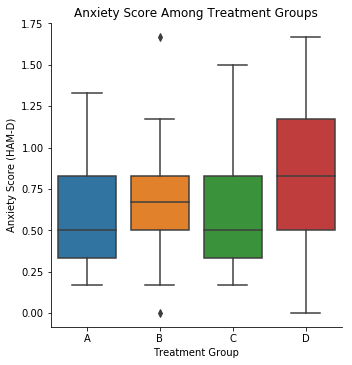

In [68]:
# Plot Anxiety Score 

order = ['A','B','C','D']
sns.catplot(x='Treatment Group',y='Anxiety Score (HAM-D)',
            kind='box',dodge=False,data=data,order=order)
plt.title('Anxiety Score Among Treatment Groups')

From the boxplot above, we can see that patients experience none to mild levels of anxiety. Patients in groups A and C have an average of anxiety score of 0.5, which is lower than the overall average anxiety score of patients in this study.  In terms of the quartile range, group B has the smallest range, yet its mean is higher to than group A and C. This might be caused by an outlier that scored 1.70, which skewed the mean to the right. Those in the placebo group (D), had the highest mean and largest quartile range among the groups. 


### Retardation Score

Retardation is measured in terms of slowness of thought and speech, impaired ability to concentrate, and decreased motor activity. A [score](https://www.outcometracker.org/library/HAM-D.pdf) of 0 indicates normal speech and thought, while a score of 4 is associated with complete stupor.

Text(0.5,1,'Retardation Score Among Treatment Groups')

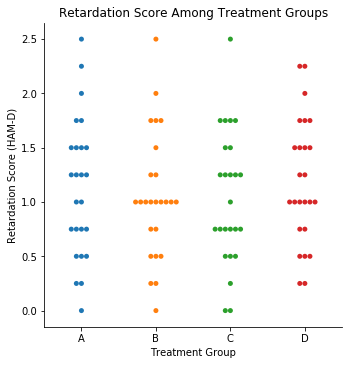

In [69]:
# Plot Retardation Score

order = ['A','B','C','D']
sns.catplot(x='Treatment Group',y='Retardation Score (HAM-D)',
            kind='swarm',dodge=False,data=data,order=order)
plt.title('Retardation Score Among Treatment Groups')

Unlike the anxiety score, all groups have similar retardation score ranging from 0.0 to 2.5. Majority of clustering occurs around a score of 1, which indicates slight retardation at interview. Groups B and D (placebo) exhibit high density around a score of 1. Meanwhile, groups A and C have higher density around 0.5 to 0.8 and 1.2 to 1.5. 

### Sleep Distrubance Score

This score measure the stages of insomnia and ranges from 0 (no difficulty falling asleep) to 2 (high difficulty in falling asleep).

/Users/tsawaengsri/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


Text(0.5,1,'Sleep Distrubance Score Among Treatment Groups')

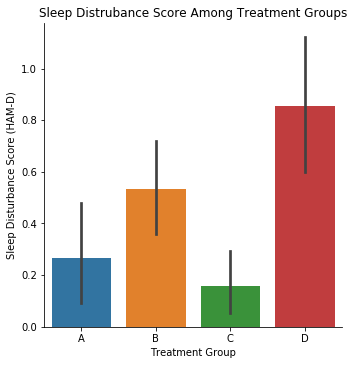

In [70]:
# Plot Sleep Distrubance Score

order = ['A','B','C','D']
sns.catplot(x='Treatment Group',y='Sleep Disturbance Score (HAM-D)',
            kind='bar',dodge=False,data=data,order=order)
plt.title('Sleep Distrubance Score Among Treatment Groups')

This bar chart indicates that patients who were given treatment A, B, and C experienced relative low sleep disturbance. Group D (placebo) generally complained about being easily disturbed during the night. Meanwhile groups C and A recalled falling asleep with out difficulty, respectively.

Now, we will take a closer look at each each measured effect. 

### Improvement Effect

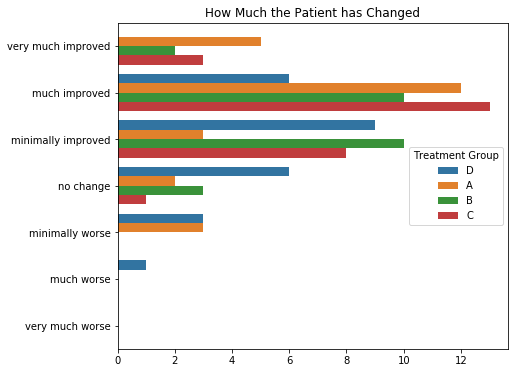

In [54]:
# Plot Improvement Effects of each treatment group

f, ax = plt.subplots(figsize=(7, 6))

order = ['very much improved','much improved','minimally improved',
         'no change','minimally worse','much worse','very much worse']
ax = sns.countplot(y='Changed', hue='Treatment Group', data=data, order=order)
ax.set(xlabel='', ylabel='', title='How Much the Patient has Changed')
plt.show()

In [39]:
# Crosstab for Improvement Effects of each treatment group

imp_eff = pd.crosstab(index=data['Changed'],
                      columns=data['Treatment Group'])
index = ['very much improved','much improved','minimally improved',
         'no change','minimally worse','much worse','very much worse']
imp_eff = imp_eff.reindex(index)

imp_eff = round((imp_eff/imp_eff.sum())*100)
imp_eff.applymap(lambda x: str(x) + '%')

Treatment Group,A,B,C,D
Changed,,,,
very much improved,20.0%,8.0%,12.0%,0.0%
much improved,48.0%,40.0%,52.0%,24.0%
minimally improved,12.0%,40.0%,32.0%,36.0%
no change,8.0%,12.0%,4.0%,24.0%
minimally worse,12.0%,0.0%,0.0%,12.0%
much worse,0.0%,0.0%,0.0%,4.0%
very much worse,nan%,nan%,nan%,nan%


At a glance, most participants have noted that their medication has had positive effect on relieving symptoms of depression. Less than four participants in treatment B and D(placebo) have reported as their conditions worsened over the duration of the study. Meanwhile, group A and C out preformed other groups when comparing patient’s feeling of improvement, with 17 and 16 patients respectively. 

Next, we will explore the therapeutic effects of the treatments.

### Therapeutic Effects

In [14]:
# Crosstab for Therapeutic Effects of each treatment group

ther_eff = pd.crosstab(index=data['Therapeutic Effect'],
                      columns=data['Treatment Group'])

ther_eff = round((ther_eff/ther_eff.sum())*100)
ther_eff.applymap(lambda x: str(x) + '%')

Treatment Group,A,B,C,D
Therapeutic Effect,,,,
marked,20.0%,12.0%,16.0%,4.0%
minimal,12.0%,24.0%,24.0%,24.0%
moderate,48.0%,52.0%,56.0%,16.0%
unchanged,8.0%,12.0%,4.0%,40.0%
worse,12.0%,0.0%,0.0%,16.0%


If we examine rows of moderate therapeutic effect, the three compounds (A, B, and C) exhibited higher rates of relaxation on patients than those who took the placebo in group D.  Treatment C appears to have the strongest therapeutic effects with 56% of patients in the group claiming they experiences moderate relaxation, followed by treatment B with 52%, and treatment A with 48%. 

Lastly, we'll look into reported adverse effects.

### Adverse Effects

Text(0.5,1,'Adverse Effects')

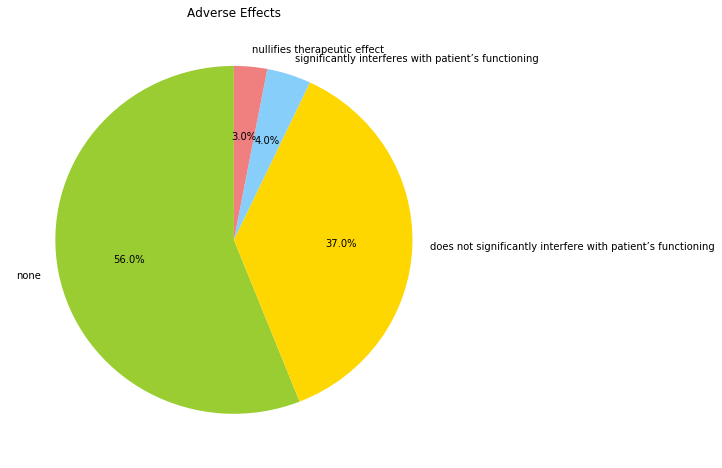

In [15]:
# Plot Adverse Effects of each treatment group
adv_eff = data['Adverse Effects'].value_counts()
adv_eff.index = ['none','does not significantly interfere with patient’s functioning',
                'significantly interferes with patient’s functioning',
                'nullifies therapeutic effect'] 
colors='yellowgreen', 'gold', 'lightskyblue', 'lightcoral',
labels = (np.array(adv_eff.index))
sizes = (np.array((adv_eff/adv_eff.sum())*100))
plt.figure(figsize=(8,8))

plt.pie(sizes,labels=labels,colors=colors,autopct='%1.1f%%', 
        startangle=90)
plt.title("Adverse Effects")


More than 90% of patients have reported that the treatments have not have had any adverse effects. Let's take a closer look at the 7% of data where patients claimed to have experienced adverse effects. 

In [38]:
# Crosstab for Adverse Effects of each treatment group

adv_eff = pd.crosstab(index=data['Adverse Effects'],
                      columns=data['Treatment Group'])
index = ['none','does not significantly interfere with patient’s functioning',
         'nullifies therapeutic effect',
         'significantly interferes with patient’s functioning']
adv_eff = adv_eff.reindex(index)

adv_eff = round((adv_eff/adv_eff.sum())*100)
adv_eff.applymap(lambda x: str(x) + '%')

Treatment Group,A,B,C,D
Adverse Effects,,,,
none,64.0%,52.0%,56.0%,52.0%
does not significantly interfere with patient’s functioning,24.0%,48.0%,40.0%,36.0%
nullifies therapeutic effect,4.0%,0.0%,0.0%,8.0%
significantly interferes with patient’s functioning,8.0%,0.0%,4.0%,4.0%


If we look at rows where patients felt that the treatment signficantly interfered with their functionality, 8% of patients in group A and 4% in groups C and D (placebo), experienced adverse effects. 

### Which compound preformed the best?

We will use the total score of HAM-D and combined effects of the treatment to determine which is most effective in alleviating symptoms of depression.

In [76]:
data.groupby(['Treatment Group']).mean()

,Patient Number,Age,Coffee/Tea Consumption (cups/day),Anxiety Score (HAM-D),Retardation Score (HAM-D),Sleep Disturbance Score (HAM-D),Total Score (HAM-D),Hopkins Obrist Cluster Total,Appetite Distrubance Score
Treatment Group,,,,,,,,,
A,43.36,42.24,2.96,0.6264,1.13,0.2664,12.72,53.16,42.34
B,45.72,37.60,3.20,0.6928,1.05,0.5332,14.04,45.96,50.02
C,49.72,40.52,2.60,0.6000,1.04,0.1596,11.48,48.88,44.30
D,63.20,42.08,2.48,0.8400,1.19,0.8536,19.20,66.68,49.56


### Motivation for A/B Testing 

### Rollout Plan

### Evaluation Plan